In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

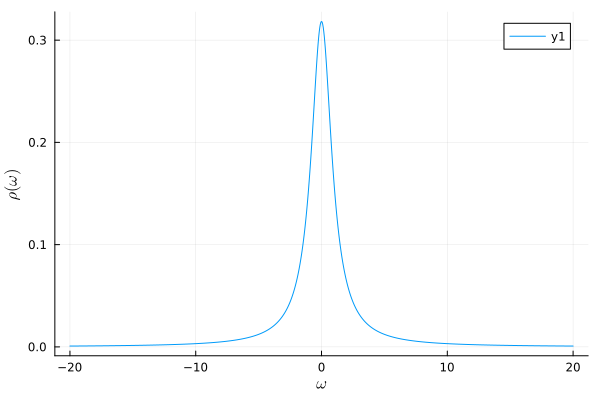

In [3]:
#define spectral function
Lorentzian(x, mu, gamma) = gamma/(pi*((x-mu)^2+gamma^2))
#rho(omega) = 0.5*Lorentzian(omega, -10.0, 0.7) + 0.5*Lorentzian(omega, 10.0, 0.7)
rho(omega) = Lorentzian(omega, 0.0, 1.)
omegas = LinRange(-20, 20, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [23]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+5
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [24]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [25]:
N_real    = 5000  #demension of array of output
omega_max = 100.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [26]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 48
H=1
Iter     Function value   Gradient norm 
     0     3.927404e-03     2.102159e-01
 * time: 0.0002570152282714844
     1     2.901139e-03     1.358928e-01
 * time: 0.5866219997406006
     2     7.976196e-04     1.301601e-01
 * time: 1.2060730457305908
     3     5.484541e-04     2.389160e-02
 * time: 1.8842980861663818
     4     5.343203e-04     8.867903e-03
 * time: 2.6688029766082764
     5     5.329597e-04     2.265730e-03
 * time: 3.6035242080688477
     6     5.327958e-04     8.665230e-04
 * time: 4.163645029067993
     7     5.327819e-04     1.239615e-04
 * time: 4.879359006881714
     8     5.327815e-04     4.500124e-05
 * time: 5.982058048248291
     9     5.327815e-04     2.022349e-05
 * time: 7.003329038619995
    10     5.327815e-04     4.893386e-06
 * time: 8.011746168136597
    11     5.327815e-04     1.249963e-06
 * time: 8.638944149017334
    12     5.327815e-04     5.536453e-07
 * time: 9.295095205307007
    13     5.327815e-04     1.866637e-0

In [27]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     5.327815e-04     6.769885e-09
 * time: 0.0002040863037109375
max_theta=0.01507484173563982295543100642416940754362
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     5.327815e-04     4.800761e-02
 * time: 0.00017690658569335938
     1     4.877368e-04     5.132729e-02
 * time: 0.776792049407959
     2     3.603818e-04     6.733167e-02
 * time: 1.5496299266815186
     3     2.278271e-04     3.482747e-02
 * time: 2.238105058670044
     4     2.025139e-04     5.111249e-03
 * time: 2.9145619869232178
     5     1.930395e-04     7.213888e-03
 * time: 3.947587013244629
     6     1.778378e-04     1.210794e-02
 * time: 5.066951036453247
     7     1.749608e-04     2.952670e-03
 * time: 5.775959014892578
     8     1.747074e-04     1.114652e-03
 * time: 6.8198699951171875
     9     1.746440e-04     5.756153e-04
 * time: 7.552049875259399
    10     1.746373e-04     3.347714e-04
 * time: 8.256206989288

    45     6.899577e-05     3.292720e-05
 * time: 43.71761202812195
    46     6.899574e-05     2.033067e-05
 * time: 44.55726599693298
    47     6.899573e-05     1.545408e-05
 * time: 45.35308313369751
    48     6.899572e-05     1.022729e-05
 * time: 46.17845296859741
    49     6.899572e-05     5.937746e-06
 * time: 47.002671003341675
    50     6.899572e-05     4.418349e-06
 * time: 47.818467140197754
    51     6.899572e-05     2.958555e-06
 * time: 48.66096901893616
    52     6.899572e-05     1.928292e-06
 * time: 49.454076051712036
    53     6.899572e-05     1.255800e-06
 * time: 50.27365708351135
    54     6.899572e-05     7.071876e-07
 * time: 51.09515309333801
    55     6.899572e-05     3.909715e-07
 * time: 51.916465044021606
    56     6.899572e-05     2.135597e-07
 * time: 52.71892213821411
    57     6.899572e-05     1.204248e-07
 * time: 53.542515993118286
    58     6.899572e-05     7.019035e-08
 * time: 54.35936212539673
    59     6.899572e-05     4.702183e-08
 *

     2     6.190369e-05     1.002951e-03
 * time: 1.9970240592956543
     3     6.187817e-05     5.116399e-04
 * time: 2.932481050491333
     4     6.182860e-05     9.207822e-04
 * time: 3.8938820362091064
     5     6.180803e-05     7.942413e-04
 * time: 4.8665690422058105
     6     6.178369e-05     7.402714e-04
 * time: 5.860846042633057
     7     6.172626e-05     6.997639e-04
 * time: 6.800144195556641
     8     6.156279e-05     9.316253e-04
 * time: 8.22913408279419
     9     6.144883e-05     7.050135e-04
 * time: 9.204655170440674
    10     6.134938e-05     5.941662e-04
 * time: 10.645596027374268
    11     6.131594e-05     3.331141e-04
 * time: 11.580888032913208
    12     6.123585e-05     1.037544e-03
 * time: 13.506821155548096
    13     6.104806e-05     2.007693e-03
 * time: 14.944738149642944
    14     6.089896e-05     9.896454e-04
 * time: 16.363946199417114
    15     6.084973e-05     3.480931e-04
 * time: 17.792387008666992
    16     6.081780e-05     8.413773e-04

   122     5.959515e-05     2.058180e-05
 * time: 126.11223602294922
   123     5.959514e-05     1.753322e-05
 * time: 127.04157018661499
   124     5.959513e-05     1.593891e-05
 * time: 127.99787211418152
   125     5.959513e-05     1.346436e-05
 * time: 128.92664217948914
   126     5.959512e-05     1.191000e-05
 * time: 129.86537218093872
   127     5.959512e-05     9.412840e-06
 * time: 130.83048701286316
   128     5.959512e-05     8.635240e-06
 * time: 131.7617950439453
   129     5.959512e-05     6.293621e-06
 * time: 132.6994001865387
   130     5.959511e-05     6.354368e-06
 * time: 133.675124168396
   131     5.959511e-05     4.771671e-06
 * time: 134.60495901107788
   132     5.959511e-05     4.719243e-06
 * time: 135.5511131286621
   133     5.959511e-05     3.866358e-06
 * time: 136.52043318748474
   134     5.959511e-05     3.402058e-06
 * time: 137.45616602897644
   135     5.959511e-05     2.831491e-06
 * time: 138.38610005378723
   136     5.959511e-05     2.332464e-0

    73     5.909062e-05     3.051582e-04
 * time: 86.87128686904907
    74     5.908925e-05     2.818585e-04
 * time: 87.92427897453308
    75     5.908815e-05     2.572298e-04
 * time: 88.9567699432373
    76     5.908709e-05     2.400180e-04
 * time: 90.02220106124878
    77     5.908624e-05     2.227797e-04
 * time: 91.04415488243103
    78     5.908541e-05     2.069405e-04
 * time: 92.08646392822266
    79     5.908475e-05     1.982217e-04
 * time: 93.133455991745
    80     5.908411e-05     1.834426e-04
 * time: 94.16071391105652
    81     5.908359e-05     1.820662e-04
 * time: 95.21860003471375
    82     5.908308e-05     1.653177e-04
 * time: 96.24083995819092
    83     5.908266e-05     1.649146e-04
 * time: 97.30624890327454
    84     5.908224e-05     1.472609e-04
 * time: 98.34045100212097
    85     5.908190e-05     1.466975e-04
 * time: 99.36934304237366
    86     5.908155e-05     1.296323e-04
 * time: 100.42757987976074
    87     5.908126e-05     1.280007e-04
 * time: 

   193     5.892824e-05     3.672646e-04
 * time: 214.5115818977356
   194     5.892659e-05     3.122357e-04
 * time: 215.6839759349823
   195     5.892516e-05     3.224956e-04
 * time: 216.74718689918518
   196     5.892369e-05     2.995786e-04
 * time: 217.8505358695984
   197     5.892242e-05     2.915355e-04
 * time: 218.90715909004211
   198     5.892111e-05     3.004932e-04
 * time: 219.96702194213867
   199     5.891999e-05     2.630328e-04
 * time: 221.06192207336426
   200     5.891884e-05     2.949762e-04
 * time: 222.1094629764557
   201     5.891787e-05     2.333332e-04
 * time: 223.20213198661804
   202     5.891689e-05     2.816430e-04
 * time: 224.26202487945557
   203     5.891608e-05     2.061475e-04
 * time: 225.3063259124756
   204     5.891527e-05     2.622171e-04
 * time: 226.40656304359436
   205     5.891459e-05     1.782848e-04
 * time: 227.45631790161133
   206     5.891392e-05     2.397147e-04
 * time: 228.5019760131836
   207     5.891335e-05     1.492136e-04

    23     5.880692e-05     1.311135e-04
 * time: 31.996459007263184
    24     5.880581e-05     1.383762e-04
 * time: 33.128273010253906
    25     5.880415e-05     1.949078e-04
 * time: 34.911226987838745
    26     5.880282e-05     1.451399e-04
 * time: 36.09063982963562
    27     5.880107e-05     1.916441e-04
 * time: 37.828367948532104
    28     5.879972e-05     1.763503e-04
 * time: 39.04097890853882
    29     5.879810e-05     2.205459e-04
 * time: 40.76695895195007
    30     5.879684e-05     2.045589e-04
 * time: 42.002450942993164
    31     5.879530e-05     2.541418e-04
 * time: 43.820955991744995
    32     5.879417e-05     2.387311e-04
 * time: 44.97724890708923
    33     5.879278e-05     2.806760e-04
 * time: 46.892802000045776
    34     5.879174e-05     2.621404e-04
 * time: 48.013592004776
    35     5.879021e-05     3.339740e-04
 * time: 49.83043885231018
    36     5.878895e-05     3.043938e-04
 * time: 50.94423484802246
    37     5.878696e-05     3.944716e-04
 *

   143     5.870488e-05     2.780920e-04
 * time: 178.92719793319702
   144     5.870434e-05     1.852062e-04
 * time: 180.0615828037262
   145     5.870375e-05     2.670556e-04
 * time: 181.19639992713928
   146     5.870322e-05     1.882761e-04
 * time: 182.3601758480072
   147     5.870264e-05     2.557524e-04
 * time: 183.50124192237854
   148     5.870212e-05     1.888398e-04
 * time: 184.69585990905762
   149     5.870156e-05     2.441557e-04
 * time: 185.82956290245056
   150     5.870106e-05     1.870009e-04
 * time: 186.9868438243866
   151     5.870052e-05     2.328733e-04
 * time: 188.13023900985718
   152     5.870004e-05     1.825828e-04
 * time: 189.26565194129944
   153     5.869952e-05     2.195581e-04
 * time: 190.43697381019592
   154     5.869907e-05     1.752830e-04
 * time: 191.57549691200256
   155     5.869858e-05     2.051229e-04
 * time: 192.82178282737732
   156     5.869816e-05     1.649507e-04
 * time: 193.99959182739258
   157     5.869772e-05     1.912160e

   263     5.868881e-05     1.716329e-04
 * time: 322.43506383895874
   264     5.868874e-05     1.687381e-04
 * time: 323.57487297058105
   265     5.868867e-05     1.824214e-04
 * time: 324.720645904541
   266     5.868860e-05     1.801503e-04
 * time: 325.8308598995209
   267     5.868852e-05     1.937428e-04
 * time: 326.9841158390045
   268     5.868844e-05     1.919357e-04
 * time: 328.0909948348999
   269     5.868835e-05     2.055356e-04
 * time: 329.23519802093506
   270     5.868827e-05     2.040363e-04
 * time: 330.34581899642944
   271     5.868817e-05     2.176597e-04
 * time: 331.47979402542114
   272     5.868808e-05     2.163583e-04
 * time: 332.6489999294281
   273     5.868798e-05     2.299533e-04
 * time: 333.7766408920288
   274     5.868788e-05     2.288095e-04
 * time: 334.9198229312897
   275     5.868777e-05     2.423193e-04
 * time: 336.0648670196533
   276     5.868767e-05     2.413598e-04
 * time: 337.2726228237152
   277     5.868755e-05     2.547884e-04
 * 

   383     5.863239e-05     1.074234e-04
 * time: 466.0482819080353
   384     5.863222e-05     1.058983e-04
 * time: 467.4049508571625
   385     5.863206e-05     9.586890e-05
 * time: 468.7889049053192
   386     5.863193e-05     8.933624e-05
 * time: 470.00434589385986
   387     5.863180e-05     8.554604e-05
 * time: 471.2180619239807
   388     5.863170e-05     7.372336e-05
 * time: 472.43189001083374
   389     5.863160e-05     7.531994e-05
 * time: 473.64120602607727
   390     5.863153e-05     6.125926e-05
 * time: 474.8821008205414
   391     5.863145e-05     6.768476e-05
 * time: 476.04513001441956
   392     5.863139e-05     5.349964e-05
 * time: 477.2662420272827
   393     5.863133e-05     6.191343e-05
 * time: 478.499675989151
   394     5.863128e-05     5.057736e-05
 * time: 479.6252648830414
   395     5.863123e-05     5.641066e-05
 * time: 480.7956819534302
   396     5.863119e-05     4.856964e-05
 * time: 482.0230839252472
   397     5.863115e-05     5.140388e-05
 * t

    20     5.859814e-05     1.122602e-04
 * time: 28.93101692199707
    21     5.859624e-05     9.152432e-05
 * time: 30.79219388961792
    22     5.859552e-05     5.698820e-05
 * time: 32.67932486534119
    23     5.859451e-05     6.874298e-05
 * time: 34.525826930999756
    24     5.859249e-05     1.709176e-04
 * time: 36.39778804779053
    25     5.859104e-05     1.361827e-04
 * time: 37.66206693649292
    26     5.858877e-05     1.800883e-04
 * time: 39.4930100440979
    27     5.858683e-05     1.779121e-04
 * time: 41.37206482887268
    28     5.858547e-05     1.291987e-04
 * time: 43.2376070022583
    29     5.858482e-05     9.282355e-05
 * time: 44.509389877319336
    30     5.858439e-05     7.757622e-05
 * time: 45.73367404937744
    31     5.858410e-05     5.073110e-05
 * time: 47.009750843048096
    32     5.858391e-05     6.144687e-05
 * time: 48.22919297218323
    33     5.858370e-05     5.634432e-05
 * time: 49.51323699951172
    34     5.858348e-05     6.296974e-05
 * tim

   140     5.856345e-05     8.082708e-05
 * time: 187.36195182800293
   141     5.856340e-05     9.337779e-05
 * time: 188.5818510055542
   142     5.856335e-05     8.609288e-05
 * time: 189.8393108844757
   143     5.856330e-05     9.692936e-05
 * time: 191.0586178302765
   144     5.856325e-05     9.120705e-05
 * time: 192.34207701683044
   145     5.856319e-05     1.016872e-04
 * time: 193.5735158920288
   146     5.856314e-05     9.628007e-05
 * time: 194.84033799171448
   147     5.856309e-05     1.066020e-04
 * time: 196.0646789073944
   148     5.856303e-05     1.014113e-04
 * time: 197.3796820640564
   149     5.856297e-05     1.115468e-04
 * time: 198.65197086334229
   150     5.856292e-05     1.066497e-04
 * time: 199.93981790542603
   151     5.856286e-05     1.166015e-04
 * time: 201.16849303245544
   152     5.856280e-05     1.119953e-04
 * time: 202.4311079978943
   153     5.856274e-05     1.218017e-04
 * time: 203.67991304397583
   154     5.856268e-05     1.174250e-04


   260     5.854448e-05     5.828496e-05
 * time: 340.73178791999817
   261     5.854444e-05     5.682039e-05
 * time: 341.9638578891754
   262     5.854440e-05     5.419086e-05
 * time: 343.2576780319214
   263     5.854436e-05     5.487104e-05
 * time: 344.47879099845886
   264     5.854433e-05     5.061160e-05
 * time: 345.7381579875946
   265     5.854430e-05     5.261021e-05
 * time: 346.95512986183167
   266     5.854427e-05     4.771025e-05
 * time: 348.21370100975037
   267     5.854424e-05     5.011837e-05
 * time: 349.4492259025574
   268     5.854422e-05     4.577112e-05
 * time: 350.71726989746094
   269     5.854419e-05     4.735862e-05
 * time: 351.93201303482056
   270     5.854417e-05     4.389284e-05
 * time: 353.2122280597687
   271     5.854415e-05     4.425936e-05
 * time: 354.4265139102936
   272     5.854412e-05     4.170060e-05
 * time: 355.6908960342407
   273     5.854410e-05     4.080761e-05
 * time: 356.91276693344116
   274     5.854408e-05     3.955949e-05


   380     5.854339e-05     7.246742e-05
 * time: 492.5738170146942
   381     5.854338e-05     7.441621e-05
 * time: 493.771390914917
   382     5.854337e-05     7.502778e-05
 * time: 495.0002989768982
   383     5.854336e-05     7.695948e-05
 * time: 496.19279384613037
   384     5.854335e-05     7.763645e-05
 * time: 497.4282109737396
   385     5.854334e-05     7.952603e-05
 * time: 498.6192090511322
   386     5.854333e-05     8.029371e-05
 * time: 499.85150694847107
   387     5.854332e-05     8.212309e-05
 * time: 501.04346895217896
   388     5.854331e-05     8.300052e-05
 * time: 502.2765190601349
   389     5.854329e-05     8.476255e-05
 * time: 503.4705150127411
   390     5.854328e-05     8.575859e-05
 * time: 504.74248600006104
   391     5.854327e-05     8.745852e-05
 * time: 506.0019459724426
   392     5.854326e-05     8.857000e-05
 * time: 507.25914883613586
   393     5.854325e-05     9.029873e-05
 * time: 508.55878591537476
   394     5.854323e-05     9.143687e-05
 *

   501     5.853329e-05     3.082868e-04
 * time: 644.1286969184875
   502     5.853306e-05     2.870523e-04
 * time: 645.3320269584656
   503     5.853282e-05     3.061610e-04
 * time: 646.5652089118958
   504     5.853259e-05     2.837881e-04
 * time: 647.7703490257263
   505     5.853235e-05     3.035373e-04
 * time: 648.9648020267487
   506     5.853212e-05     2.801846e-04
 * time: 650.2085509300232
   507     5.853188e-05     3.005346e-04
 * time: 651.4131419658661
   508     5.853164e-05     2.761000e-04
 * time: 652.6530678272247
   509     5.853141e-05     2.972954e-04
 * time: 653.922651052475
   510     5.853118e-05     2.713302e-04
 * time: 655.300549030304
   511     5.853095e-05     2.939073e-04
 * time: 656.5486030578613
   512     5.853072e-05     2.656324e-04
 * time: 657.7857248783112
   513     5.853049e-05     2.903418e-04
 * time: 658.9793050289154
   514     5.853026e-05     2.590776e-04
 * time: 660.2266268730164
   515     5.853003e-05     2.864308e-04
 * time: 

   622     5.851304e-05     5.661896e-05
 * time: 796.8393619060516
   623     5.851300e-05     5.472826e-05
 * time: 798.0860028266907
   624     5.851297e-05     5.363485e-05
 * time: 799.2734849452972
   625     5.851294e-05     5.134056e-05
 * time: 800.5194230079651
   626     5.851290e-05     5.104146e-05
 * time: 801.7064929008484
   627     5.851287e-05     4.901403e-05
 * time: 802.9622950553894
   628     5.851285e-05     4.837202e-05
 * time: 804.1641609668732
   629     5.851282e-05     4.699544e-05
 * time: 805.4029529094696
   630     5.851279e-05     4.640021e-05
 * time: 806.6039700508118
   631     5.851277e-05     4.520727e-05
 * time: 807.8339428901672
   632     5.851274e-05     4.445291e-05
 * time: 809.0296950340271
   633     5.851272e-05     4.453456e-05
 * time: 810.223965883255
   634     5.851270e-05     4.221109e-05
 * time: 811.4776878356934
   635     5.851268e-05     4.359832e-05
 * time: 812.790864944458
   636     5.851266e-05     3.972717e-05
 * time: 

   743     5.851236e-05     2.742513e-07
 * time: 945.7714169025421
   744     5.851236e-05     2.268391e-07
 * time: 946.9530339241028
   745     5.851236e-05     2.366787e-07
 * time: 948.1728420257568
   746     5.851236e-05     1.900151e-07
 * time: 949.3684680461884
   747     5.851236e-05     2.039566e-07
 * time: 950.6006789207458
   748     5.851236e-05     1.604135e-07
 * time: 951.792641878128
   749     5.851236e-05     1.769255e-07
 * time: 953.022222995758
   750     5.851236e-05     1.381927e-07
 * time: 954.2148098945618
   751     5.851236e-05     1.531381e-07
 * time: 955.4486508369446
   752     5.851236e-05     1.237667e-07
 * time: 956.6450638771057
   753     5.851236e-05     1.326713e-07
 * time: 957.8375689983368
   754     5.851236e-05     1.113918e-07
 * time: 959.0836999416351
   755     5.851236e-05     1.148073e-07
 * time: 960.2785849571228
   756     5.851236e-05     1.001292e-07
 * time: 961.5152959823608
   757     5.851236e-05     9.903019e-08
 * time: 

    73     5.848871e-05     6.184517e-05
 * time: 107.62513399124146
    74     5.848868e-05     4.497869e-05
 * time: 108.92170715332031
    75     5.848864e-05     6.478136e-05
 * time: 110.25628900527954
    76     5.848861e-05     5.010100e-05
 * time: 111.53394603729248
    77     5.848857e-05     6.785850e-05
 * time: 112.87628197669983
    78     5.848854e-05     5.643387e-05
 * time: 114.19430208206177
    79     5.848851e-05     7.106839e-05
 * time: 115.57770299911499
    80     5.848848e-05     6.343040e-05
 * time: 116.94397211074829
    81     5.848844e-05     7.440321e-05
 * time: 118.28289198875427
    82     5.848841e-05     7.011156e-05
 * time: 119.57494020462036
    83     5.848838e-05     7.838783e-05
 * time: 120.90722298622131
    84     5.848835e-05     7.631657e-05
 * time: 122.30115008354187
    85     5.848831e-05     8.296298e-05
 * time: 123.69912314414978
    86     5.848828e-05     8.202123e-05
 * time: 125.2721312046051
    87     5.848824e-05     8.75654

   193     5.848259e-05     1.280656e-04
 * time: 266.76730012893677
   194     5.848253e-05     1.349414e-04
 * time: 268.11733198165894
   195     5.848248e-05     1.293627e-04
 * time: 269.4939241409302
   196     5.848242e-05     1.355927e-04
 * time: 271.0313642024994
   197     5.848236e-05     1.313935e-04
 * time: 272.35346508026123
   198     5.848230e-05     1.358327e-04
 * time: 273.70692205429077
   199     5.848223e-05     1.332873e-04
 * time: 274.9900209903717
   200     5.848217e-05     1.355224e-04
 * time: 276.4700150489807
   201     5.848210e-05     1.346347e-04
 * time: 277.7461631298065
   202     5.848204e-05     1.345641e-04
 * time: 279.06069707870483
   203     5.848196e-05     1.353146e-04
 * time: 280.3310761451721
   204     5.848190e-05     1.329193e-04
 * time: 281.6553900241852
   205     5.848183e-05     1.352721e-04
 * time: 282.924782037735
   206     5.848176e-05     1.306109e-04
 * time: 284.24742102622986
   207     5.848169e-05     1.345289e-04
 *

   313     5.847593e-05     9.036647e-05
 * time: 427.5617070198059
   314     5.847589e-05     8.731514e-05
 * time: 428.88212513923645
   315     5.847585e-05     8.893280e-05
 * time: 430.16474199295044
   316     5.847582e-05     8.472759e-05
 * time: 431.5111141204834
   317     5.847578e-05     8.759062e-05
 * time: 432.8030970096588
   318     5.847575e-05     8.184930e-05
 * time: 434.118497133255
   319     5.847571e-05     8.620365e-05
 * time: 435.3974440097809
   320     5.847567e-05     7.869352e-05
 * time: 436.72558212280273
   321     5.847564e-05     8.469342e-05
 * time: 438.0503890514374
   322     5.847560e-05     7.528455e-05
 * time: 439.3319652080536
   323     5.847557e-05     8.305159e-05
 * time: 440.7814450263977
   324     5.847553e-05     7.165682e-05
 * time: 442.2522921562195
   325     5.847549e-05     8.127472e-05
 * time: 443.63875102996826
   326     5.847546e-05     6.785191e-05
 * time: 444.92591619491577
   327     5.847542e-05     7.936630e-05
 * 

   434     5.847248e-05     1.050452e-04
 * time: 591.3022820949554
   435     5.847246e-05     9.443239e-05
 * time: 592.6665070056915
   436     5.847243e-05     1.072962e-04
 * time: 594.0846800804138
   437     5.847241e-05     9.823573e-05
 * time: 595.4137101173401
   438     5.847239e-05     1.100848e-04
 * time: 596.7390961647034
   439     5.847236e-05     1.019345e-04
 * time: 598.0252799987793
   440     5.847234e-05     1.130525e-04
 * time: 599.3826580047607
   441     5.847231e-05     1.055079e-04
 * time: 600.6694571971893
   442     5.847229e-05     1.158660e-04
 * time: 602.0262789726257
   443     5.847226e-05     1.089370e-04
 * time: 603.3192381858826
   444     5.847223e-05     1.185096e-04
 * time: 604.6770520210266
   445     5.847221e-05     1.122018e-04
 * time: 605.9732570648193
   446     5.847218e-05     1.209569e-04
 * time: 607.3382031917572
   447     5.847215e-05     1.152767e-04
 * time: 608.7170071601868
   448     5.847213e-05     1.231649e-04
 * time

   555     5.846873e-05     7.234479e-05
 * time: 753.7150180339813
   556     5.846869e-05     7.167052e-05
 * time: 755.0681040287018
   557     5.846865e-05     7.206430e-05
 * time: 756.4788551330566
   558     5.846861e-05     7.357543e-05
 * time: 757.86550116539
   559     5.846857e-05     7.152496e-05
 * time: 759.2302820682526
   560     5.846853e-05     7.505350e-05
 * time: 760.5615830421448
   561     5.846849e-05     7.079900e-05
 * time: 761.902095079422
   562     5.846845e-05     7.613937e-05
 * time: 763.1771550178528
   563     5.846841e-05     6.995045e-05
 * time: 764.5091211795807
   564     5.846838e-05     7.685557e-05
 * time: 765.7790701389313
   565     5.846833e-05     6.902053e-05
 * time: 767.1074872016907
   566     5.846830e-05     7.720704e-05
 * time: 768.3748581409454
   567     5.846825e-05     6.801914e-05
 * time: 769.7011790275574
   568     5.846822e-05     7.718385e-05
 * time: 770.9691641330719
   569     5.846817e-05     6.706970e-05
 * time: 7

   676     5.846657e-05     2.273444e-05
 * time: 911.500018119812
   677     5.846656e-05     1.586992e-05
 * time: 912.7706050872803
   678     5.846656e-05     2.245989e-05
 * time: 914.1351981163025
   679     5.846655e-05     1.486740e-05
 * time: 915.4443991184235
   680     5.846655e-05     2.194959e-05
 * time: 916.7742941379547
   681     5.846655e-05     1.394885e-05
 * time: 918.0379719734192
   682     5.846654e-05     2.118548e-05
 * time: 919.3365750312805
   683     5.846654e-05     1.338792e-05
 * time: 920.7209479808807
   684     5.846654e-05     2.017992e-05
 * time: 922.1830070018768
   685     5.846653e-05     1.301359e-05
 * time: 923.5021460056305
   686     5.846653e-05     1.897411e-05
 * time: 924.8297061920166
   687     5.846653e-05     1.295730e-05
 * time: 926.0913701057434
   688     5.846653e-05     1.769821e-05
 * time: 927.3866021633148
   689     5.846652e-05     1.314661e-05
 * time: 928.6426801681519
   690     5.846652e-05     1.654163e-05
 * time:

   796     5.846641e-05     8.454593e-06
 * time: 1067.7908580303192
   797     5.846641e-05     8.226996e-06
 * time: 1069.0937900543213
   798     5.846641e-05     8.519455e-06
 * time: 1070.365578174591
   799     5.846641e-05     8.622821e-06
 * time: 1071.6732201576233
   800     5.846641e-05     8.595487e-06
 * time: 1072.9434571266174
   801     5.846641e-05     9.028153e-06
 * time: 1074.2550401687622
   802     5.846641e-05     8.843178e-06
 * time: 1075.543133020401
   803     5.846641e-05     9.443412e-06
 * time: 1076.8592879772186
   804     5.846641e-05     9.095650e-06
 * time: 1078.1247310638428
   805     5.846641e-05     9.872925e-06
 * time: 1079.4356791973114
   806     5.846641e-05     9.415793e-06
 * time: 1080.7074229717255
   807     5.846641e-05     1.032366e-05
 * time: 1082.0161900520325
   808     5.846641e-05     9.882151e-06
 * time: 1083.2948920726776
   809     5.846641e-05     1.080315e-05
 * time: 1084.556927204132
   810     5.846641e-05     1.037304e

   916     5.846630e-05     3.190800e-05
 * time: 1223.8359260559082
   917     5.846630e-05     2.905875e-05
 * time: 1225.1701211929321
   918     5.846630e-05     3.226907e-05
 * time: 1226.481230020523
   919     5.846629e-05     2.931544e-05
 * time: 1227.739686012268
   920     5.846629e-05     3.258961e-05
 * time: 1229.0628581047058
   921     5.846629e-05     2.958132e-05
 * time: 1230.324553012848
   922     5.846629e-05     3.287081e-05
 * time: 1231.639722108841
   923     5.846629e-05     2.985516e-05
 * time: 1232.902615070343
   924     5.846629e-05     3.311647e-05
 * time: 1234.2148060798645
   925     5.846629e-05     3.013674e-05
 * time: 1235.5241351127625
   926     5.846628e-05     3.333308e-05
 * time: 1236.8012020587921
   927     5.846628e-05     3.057354e-05
 * time: 1238.0606000423431
   928     5.846628e-05     3.362041e-05
 * time: 1239.3717319965363
   929     5.846628e-05     3.113036e-05
 * time: 1240.6328392028809
   930     5.846628e-05     3.414650e-0

In [28]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 48


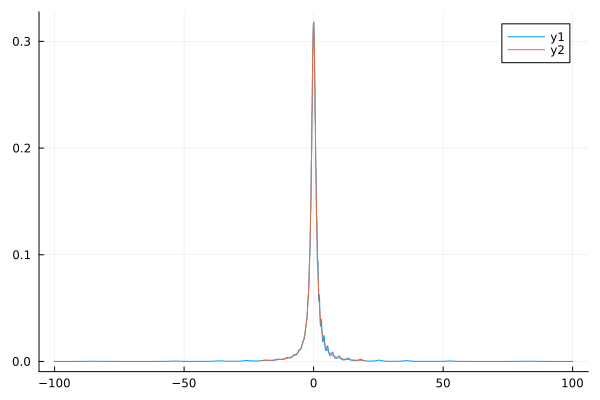

In [29]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
#plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

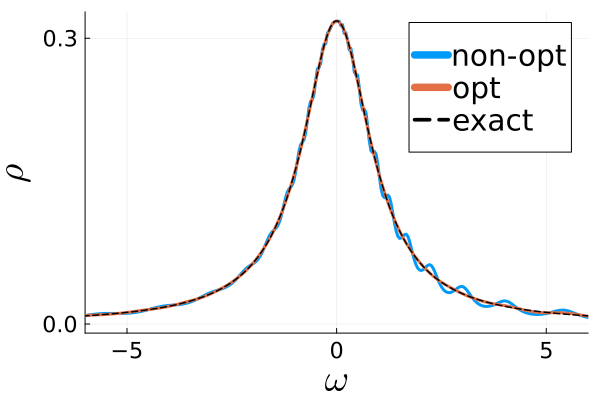

In [30]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")